In [10]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# PATH if needs to install 
# "/Users/cn180450/anaconda3/envs/py36/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Users/cn180450/anaconda3/condabin"

def display(image, flip=True, cmap=None, figsize=(6, 6), **kwargs):
    if flip:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # image.shape = (hieght, width, channels)
    width=image.shape[1] 
    height=image.shape[0]
    margin=50 
    # dots per inch
    dpi=100.
    # inches
    figsize=((width+2*margin)/dpi, (height+2*margin)/dpi)
    #axes ratio
    left = margin/dpi/figsize[0] 
    bottom = margin/dpi/figsize[1]
    fig = plt.figure(figsize=figsize, dpi=dpi)
    fig.subplots_adjust(left=left, bottom=bottom, right=1.-left, top=1.-bottom)
    # plt.figure(figsize=(6, 6))
    _ = plt.imshow(image, cmap=cmap)
    plt.title(kwargs.get("title", None))
    plt.axis("off")

### Non-Photorealistic Rendering using OpenCV

https://www.learnopencv.com/non-photorealistic-rendering-using-opencv-python-c/ 

#### Normal Image

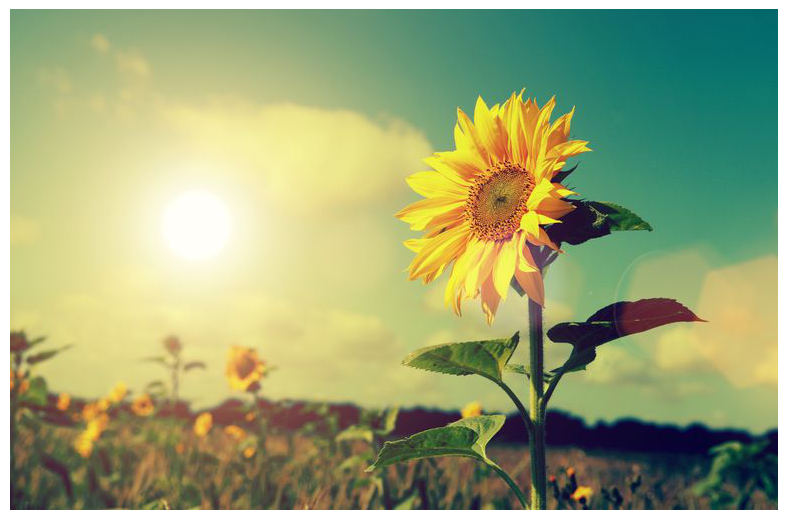

In [2]:
image = cv2.imread("images/sunflower2.png")
display(image)

#### Edge Preserving Filter

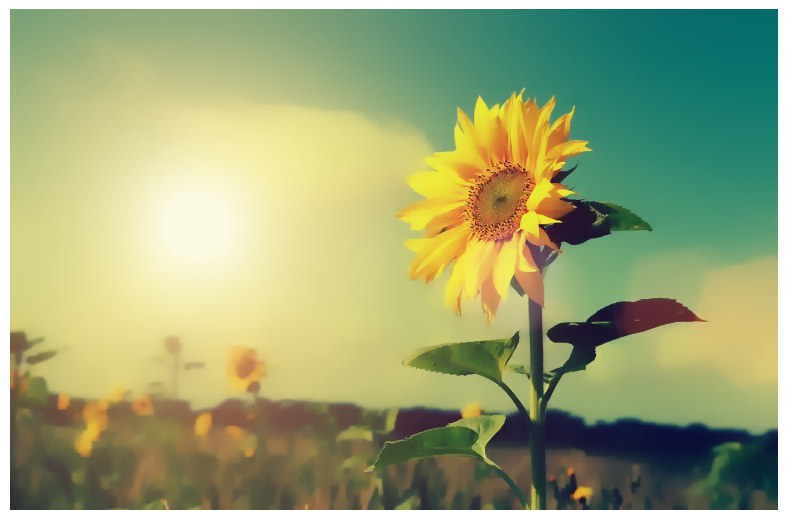

In [3]:
filtered = cv2.edgePreservingFilter(
    src=image,
    flags=1,
    sigma_s=50,
    sigma_r=0.3
)
display(filtered)

#### Detail Enhancing Filter 

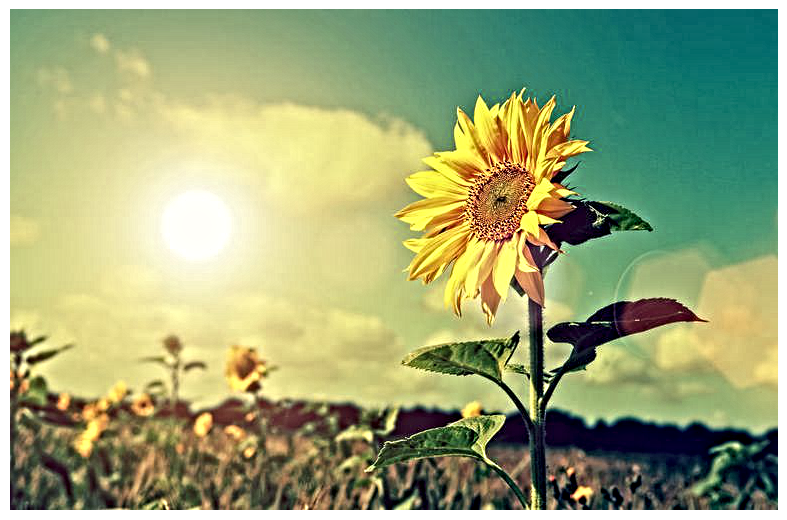

In [4]:
detailed = cv2.detailEnhance(
    src=image,
    sigma_s=10,
    sigma_r=0.15
)
display(detailed)

#### PencilSketch Filter

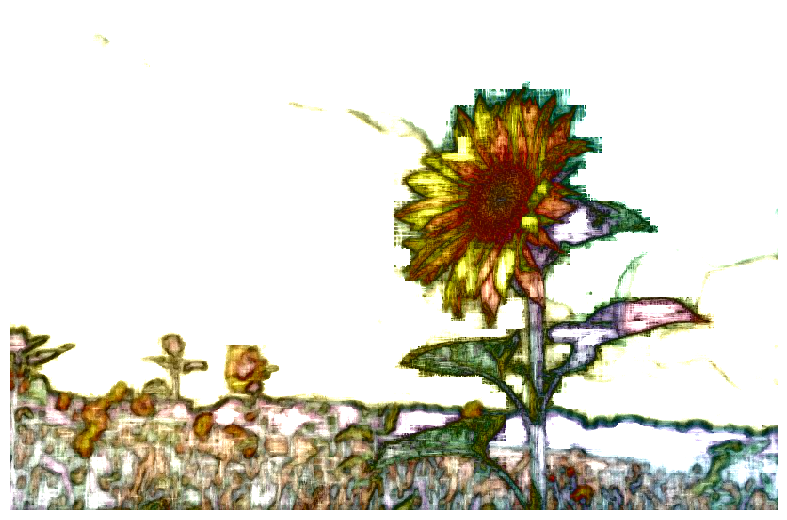

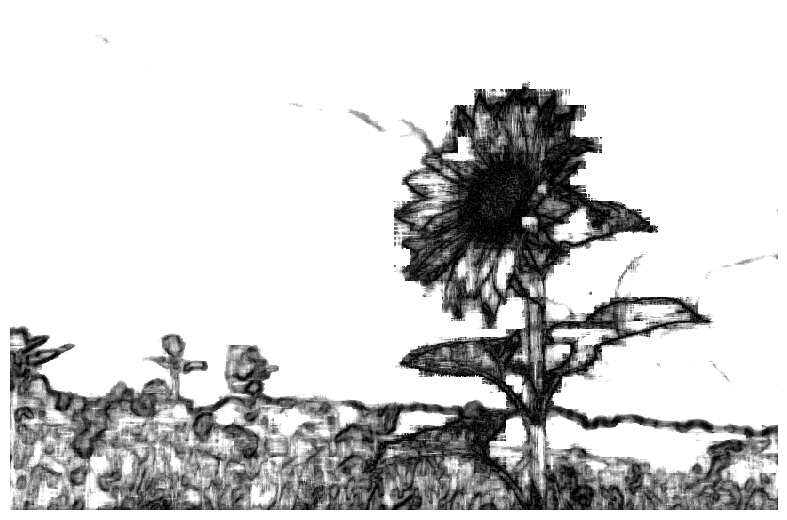

In [5]:
pencil_gray, pencil_color = cv2.pencilSketch(
    src=image,
    sigma_s=60,
    sigma_r=0.07,
    shade_factor=0.05
)
display(pencil_color)
display(pencil_gray, flip=False, cmap="gray")

#### Stylization Filter ( stylization )
The stylization filter produces a output that looks like the image was painted using water color.

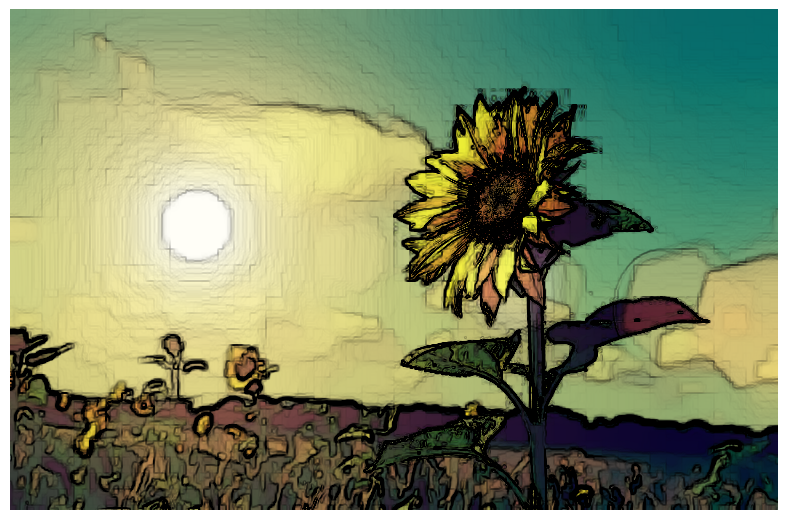

In [6]:
stylization = cv2.stylization(
    src=image,
    sigma_s=60,
    sigma_r=0.07
)
display(stylization)

### Dlib Testing

In [11]:
import dlib
import imutils.face_utils 
# dlib trained model available in this link
# http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

In [12]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("../shape_predictor_68_face_landmarks.dat")

In [24]:
image = cv2.imread("images/florida_trip.png")
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [25]:
# detect faces in image 
rects = detector(gray, 1)

In [26]:
len(rects)

1